In [1]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

In [ ]:
class BatsManState(TypedDict):
    runs: int
    balls: int
    six:int
    fours:int

    strike_rate: float
    boundary_percent:float
    balls_per_boundary:float
    summary:str

In [12]:
def calculate_strike_rate(state: BatsManState):
    if state['balls'] == 0:
        return {"strike_rate": 0.0}
    return {"strike_rate": (state['runs'] / state['balls']) * 100}

def calculate_boundary_percent(state: BatsManState):
    if state['runs'] == 0:
        return {"boundary_percent": 0.0}
    return {"boundary_percent": ((state['fours'] + state['six']) / state['runs']) * 100}

def calculate_balls_per_boundary(state: BatsManState):
    if state['fours'] + state['six'] == 0:
        return {"balls_per_boundary": 0.0}
    return {"balls_per_boundary": state['balls'] / (state['fours'] + state['six'])}

def calculate_summary(state: BatsManState) -> dict:
    summary='''
    Batsman Summary:
    - Strike Rate: {strike_rate}
    - Boundary Percent: {boundary_percent}
    - Balls per Boundary: {balls_per_boundary}
    '''.format(
        strike_rate=calculate_strike_rate(state),
        boundary_percent=calculate_boundary_percent(state),
        balls_per_boundary=calculate_balls_per_boundary(state)
    )
    return {"summary": summary}


In [13]:
graph=StateGraph(BatsManState)

graph.add_node("calculate_strike_rate",calculate_strike_rate)
graph.add_node("calculate_boundary_percent",calculate_boundary_percent)
graph.add_node("calculate_balls_per_boundary",calculate_balls_per_boundary)
graph.add_node("calculate_summary",calculate_summary)



graph.add_edge(START,"calculate_strike_rate")
graph.add_edge(START,"calculate_boundary_percent")
graph.add_edge(START,"calculate_balls_per_boundary")

graph.add_edge("calculate_strike_rate","calculate_summary")
graph.add_edge("calculate_boundary_percent","calculate_summary")
graph.add_edge("calculate_balls_per_boundary","calculate_summary")

graph.add_edge("calculate_summary",END)

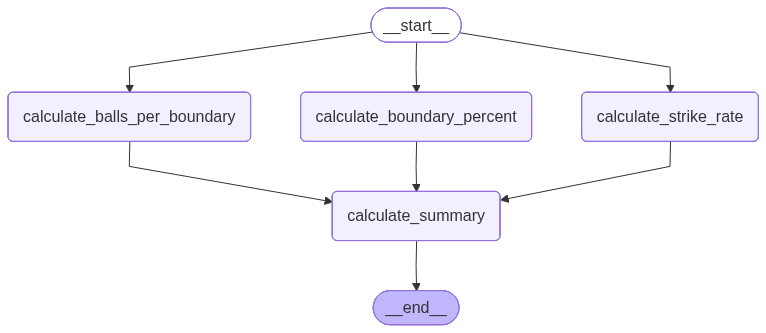

In [9]:
workflow=graph.compile()
workflow

In [14]:
initial_state = {
    'runs': 50,
    'balls': 30,
    'fours': 5,
    'six': 2
}
workflow.invoke(initial_state)

{'runs': 50,
 'balls': 30,
 'six': 2,
 'fours': 5,
 'strike_rate': 166.66666666666669,
 'boundary_percent': 14.000000000000002,
 'balls_per_boundary': 4.285714285714286}